In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_30/dsad_2021/common
default checking
Running command `conda list`... ok
Running command `conda install --yes jupyterlab=2.2.6`... 

KeyboardInterrupt: 

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>

# <h1><center><ins>EVALUACIÓN DE MODELOS EN PROBLEMAS DE CLASIFICACIÓN</ins></center></h1>
<h1><center>Checkpoint —solución—:</center></h1>
<img src="img/01_Ev_Modelos_caratula.jpeg" alt="Drawing" style="width: 300px;"/>

<a id="tabla_contenidos"></a> 
## Tabla de Contenidos

### <a href='#section_objetivos'>0. Objetivos de la Notebook</a>


### <a href='#section_repaso'>1. Lo que tenés que hacer es...</a>
- #### <a href='#section_reg_vs_clas'>1.1 ...cargar el dataset, instanciar y entrenar un modelo de KNeighborsClassifier:</a>
- #### <a href='#section_outcomes'>1.2 ...evaluar el modelo:</a>
- #### <a href='#section_matriz_confusion'>1.3 ...¿qué podemos concluir?:</a>


### <a href='#section_metricas'>2. BONUS</a>
---

<a id="section_objetivos"></a> 
## 0. Objetivos de la Notebook

<div id="caja11" style="float:left;width: 100%;">
  <div style="float:left;width: 9%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;">
      <label>Poner en práctica lo aprendido en la notebook de práctica guiada.</label>
  <div style="float:left;width: 85%;">
      <label>Es importante que antes de la clase resuelvan esta notebook ya que es fundamental que sepan utilizar las herramientas que vimos en la práctica guiada para después trabajar el caso práctico en la clase.</label>        
</div>    
</div>

<a href='#tabla_contenidos'>Volver a TOC</a>

---

<a id="section_repaso"></a> 
## 1. Lo que tenés que hacer es...

<a id="section_reg_vs_clas"></a> 
### 1.1 ...cargar el dataset, instanciar y entrenar un modelo de [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):

Importá el dataset que utilizamos en la práctica guiada **HR_comma_sep.csv**

Instanciá un modelo de vecinos más cercanos (utilicen el número de vecinos que viene por default en [`scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))

**CUIDADO:** revisá en la notebook de la **Práctica Guiada** todos los pasos previos que hicimos antes de instanciar y entrenar el modelo. Y utilizá los mismos predictores que usámos en la **Práctica Guiada**

In [24]:
# Importá las librerías que vas a necesitar...
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
# Cartá en un dataframe el data set...
df = pd.read_csv('../Data/HR_comma_sep.csv')
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
829,0.38,0.53,2,138,3,0,1,0,product_mng,low
3534,0.59,0.66,3,186,3,0,0,0,sales,medium
2704,0.63,0.50,5,246,2,0,0,0,hr,low
12137,0.42,0.48,2,129,3,0,1,0,management,low
8560,0.64,0.78,5,156,5,1,0,0,sales,low


In [26]:
# Instanciá y entrená el modelo...
train_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
              'time_spend_company', 'Work_accident', 'promotion_last_5years']
X = df[train_cols]
y = df['left']

In [27]:
# Hacemos el train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# Scalomos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Instanciamos y entrenamos el modelo
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

<a id="section_outcomes"></a> 
### 1.2 ...evaluar el modelo:

A lo que vinimos: ahora tenés que evaluar el modelo con las distintas métricas que vimos en la **Práctica guiada**


In [30]:
# ¿Cómo es la distribución de los datos en train y test?
y_train.value_counts(normalize=True)

0    0.762165
1    0.237835
Name: left, dtype: float64

In [31]:
y_test.value_counts(normalize=True)

0    0.761414
1    0.238586
Name: left, dtype: float64

In [32]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[3693,   76],
       [ 111, 1070]])

In [33]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy=', accuracy_score(y_test, y_pred))

Accuracy= 0.9622222222222222


In [34]:
# Sensitivity o recall_score
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.9060118543607113


In [35]:
# Specificity
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

specificity = TN / (TN + FP)

print(specificity)

0.9798355001326612


In [36]:
# Precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.9336823734729494


In [37]:
# F1-Score
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.9196390201976795


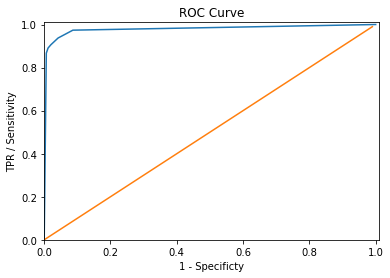

In [38]:
# ROC Curve y AUC
y_pred_proba = neigh.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr_knn,tpr_knn,thr_knn = roc_curve(y_test, y_pred_proba[:,1])

df = pd.DataFrame(dict(fpr=fpr_knn, tpr=tpr_knn, thr = thr_knn))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [39]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_knn, tpr_knn))

AUC= 0.9792128575084096


<a id="section_matriz_confusion"></a> 
### 1.3 ...¿qué podemos concluir?:

¿Cómo le fue a este modelo respecto de los que evaluamos en la **Práctica Guiada**?

- El modelo de default [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) con cinco vecinos tuvo un mejor desempeño que la [`LogisticRegession`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

<a href='#tabla_contenidos'>Volver a TOC</a>

---

<a id="section_metricas"></a> 
## 2. BONUS

<div id="caja11" style="float:left;width: 100%;">
  <div style="float:left;width: 9%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;">
      <label>¿Te animás a entrenar un modelo con otro <b>número de vecinos</b> (elegí el que vos quieras) y compararlo con el que hiciste antes (podés usar la Curva ROC para verlos a ambos juntos)?.</label>
</div>    
</div>

In [40]:
neigh_dos = KNeighborsClassifier(n_neighbors=10)
neigh_dos.fit(X_train, y_train)

y_pred_proba_dos = neigh_dos.predict_proba(X_test)

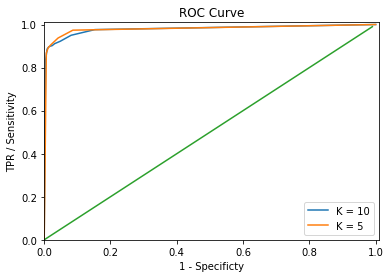

In [41]:
fpr_dos,tpr_dos,thr_dos = roc_curve(y_test, y_pred_proba_dos[:,1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_dos,tpr_dos)
plt.plot(fpr_knn,tpr_knn)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['K = 10','K = 5'])
plt.show() 

In [42]:
print('AUC K-5=', auc(fpr_knn, tpr_knn))
print('AUC K-10=', auc(fpr_dos, tpr_dos))

AUC K-5= 0.9792128575084096
AUC K-10= 0.9785413515355109


In [43]:
# Matriz de confusión K=10
confusion_dos = confusion_matrix(y_test, neigh_dos.predict(X_test))
confusion_dos

array([[3701,   68],
       [ 119, 1062]])

In [44]:
# Matriz de confusión K = 5
confusion

array([[3693,   76],
       [ 111, 1070]])

<a href='#tabla_contenidos'>Volver a TOC</a>